In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean_data(coho_n):
    path = '../Data/extracted/Cohort' + str(coho_n) + '.csv'
    df = pd.read_csv(path)
    pics = pd.read_csv('../pics/pics.csv')
    
    df_long = pd.melt(df, id_vars=['ID'], value_vars=list(df.columns[7:47]),var_name='pic', value_name='rating')
    df_long = df_long.merge(pics, left_on='pic', right_on='pic').sort_values(['ID'])
    df_long['rating'] = df_long['rating']/100
    #df_long['scale_rating'] = df_long['scale_rating']/10
    df_long = df_long[df_long['NAPSr']<5].reset_index(drop=True)
    
    sns.lineplot(data=df_long, x='NAPSr', y='rating')
    plt.show()
    df_long = df_long.dropna()
    df_long = df_long[['ID','pic','rating']]
    
    pic_rating = df_long.groupby(['pic']).mean().reset_index()
    pic_rating = pic_rating.rename(columns={'rating': 'mean'})

    pic_sd = df_long.groupby('pic')['rating'].std().reset_index()
    pic_sd = pic_sd.rename(columns={'rating': 'sd'})
    pic_scores = pd.concat([pic_rating, pic_sd], axis=1)
    pic_scores = pic_scores.loc[:,~pic_scores.columns.duplicated()]
    
    df_long['outlier'] = 0
    for i, row in df_long.iterrows():
        pic = pic_scores[pic_scores['pic']==df_long['pic'][i]]
        if df_long['rating'][i] > pic['mean'].values[0] + pic['sd'].values[0]*3:
            df_long.at[i, 'outlier'] = 1
        if df_long['rating'][i] < pic['mean'].values[0] - pic['sd'].values[0]*3:
            df_long.at[i, 'outlier'] = 1
    outliers = df_long.groupby(['ID']).sum().reset_index()
    outliers = outliers[outliers['outlier']>1]
    print('in cohort',coho_n,'number of outliers: ', outliers.shape[0])
    
    reject_IDs = outliers['ID'].values
    df_out = df[df['ID'].isin(reject_IDs)]
    df = df[~df['ID'].isin(reject_IDs)]
    
    path_to_sav = '../Data/clean/Cohort' + str(coho_n) + 'Clean.csv'
    df.to_csv(path_to_sav)
    df_out.to_csv('../Data/outliers/Cohort' + str(coho_n) + 'outliers.csv')

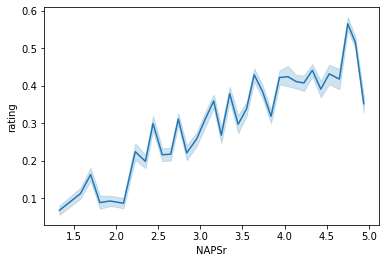

in cohort 4 number of outliers:  17


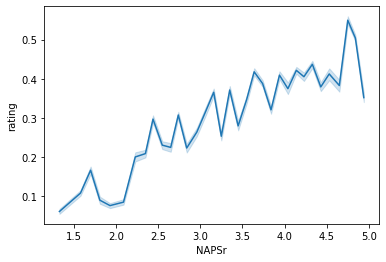

in cohort 5 number of outliers:  66


In [3]:
clean_data(4)
clean_data(5)